In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Read in FARS data from csv.  Data prior to 2015 is in sas or dbf format, so a differnt method will need to be used  Accident file contains information about the crashes at a per crash level.  

In [3]:
accident = pd.DataFrame.from_csv('nhtsa-fars-data/FARS2015NationalCSV/accident.csv', index_col=None)
accident.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,...,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,...,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,...,99,7,16,88,88,0,0,0,1,0


FARS data by person, which is needed to get driver demographic data, like age.  This table can be combined with accident using the STATE and ST_CASE columns

In [4]:
person = pd.DataFrame.from_csv('nhtsa-fars-data/FARS2015NationalCSV/person.csv', index_col=None)
person.head()

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,127,1,1,2,...,240,0,0,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,83,1,1,22,...,2213,0,0,0,0,0,0,7,1,0
2,1,10003,1,1,1,0,11,1,1,1,...,125,0,0,0,0,0,0,7,2,0
3,1,10003,1,1,2,0,11,1,1,1,...,8888,999,99,0,0,0,8,0,0,0
4,1,10004,1,1,1,0,45,4,1,0,...,57,0,0,0,0,0,0,7,1,0


Import census data, 2011-2015

In [5]:
census = pd.DataFrame.from_csv('census_data/cc-est2015-subset.csv', index_col=None, encoding = 'utf-8')
census.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077


## Exploratory analysis

Q1: Number of accidents per state

    STATE   ACC
0       1   783
1       2    60
2       4   810
3       5   472
4       6  2925
5       8   506
6       9   253
7      10   122
8      11    23
9      12  2699
10     13  1327
11     15    86
12     16   198
13     17   914
14     18   756
15     19   282
16     20   322
17     21   694
18     22   674
19     23   144
20     24   472
21     25   291
22     26   893
23     27   375
24     28   604
25     29   802
26     30   204
27     31   218
28     32   296
29     33   103
30     34   522
31     35   269
32     36  1046
33     37  1275
34     38   111
35     39  1029
36     40   588
37     41   412
38     42  1102
39     44    41
40     45   909
41     46   115
42     47   884
43     48  3124
44     49   256
45     50    50
46     51   711
47     53   516
48     54   246
49     55   523
50     56   129


(array([ 11.,  11.,   4.,   6.,   5.,   6.,   3.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([   23.  ,   178.05,   333.1 ,   488.15,   643.2 ,   798.25,
          953.3 ,  1108.35,  1263.4 ,  1418.45,  1573.5 ,  1728.55,
         1883.6 ,  2038.65,  2193.7 ,  2348.75,  2503.8 ,  2658.85,
         2813.9 ,  2968.95,  3124.  ]),
 <a list of 20 Patch objects>)

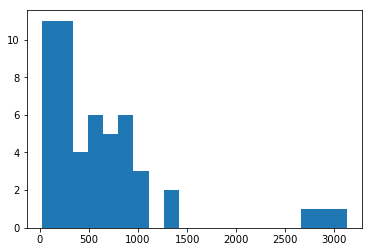

In [6]:
a = accident
acc_state = a.groupby(a.STATE).size().to_frame().reset_index()
acc_state.columns = ['STATE', 'ACC']
print(acc_state)
plt.hist(acc_state.ACC, normed=False, bins=20)

Want to adjust by state population to get accidents per capita

In [7]:
#summarize population by state)
c = census
#filter for year == 8, which is 2015 estimate(most recent and corresponds with accident data)
#and age group 0, which is total
c15 = c[(c['YEAR'] == 8) & (c['AGEGRP'] == 0)]
pop_state = c15.groupby(c15.STATE)[['TOT_POP']].sum().reset_index()
pop_state.head()

,STATE,TOT_POP
0,1,4858979
1,2,738432
2,4,6828065
3,5,2978204
4,6,39144818


In [8]:
#combine with accident data 
acc_pop =  pd.merge(acc_state, pop_state, how='left', on=['STATE'])
acc_pop.head()


,STATE,ACC,TOT_POP
0,1,783,4858979
1,2,60,738432
2,4,810,6828065
3,5,472,2978204
4,6,2925,39144818


    STATE   ACC   TOT_POP    POP_MIL     ACC_MIL
0       1   783   4858979   4.858979  161.144965
1       2    60    738432   0.738432   81.253250
2       4   810   6828065   6.828065  118.628045
3       5   472   2978204   2.978204  158.484778
4       6  2925  39144818  39.144818   74.722534
5       8   506   5456574   5.456574   92.732180
6       9   253   3590886   3.590886   70.456149
7      10   122    945934   0.945934  128.973057
8      11    23    672228   0.672228   34.214582
9      12  2699  20271272  20.271272  133.144087
10     13  1327  10214860  10.214860  129.908780
11     15    86   1431603   1.431603   60.072520
12     16   198   1654930   1.654930  119.642523
13     17   914  12859995  12.859995   71.073123
14     18   756   6619680   6.619680  114.204916
15     19   282   3123899   3.123899   90.271805
16     20   322   2911641   2.911641  110.590557
17     21   694   4425092   4.425092  156.832897
18     22   674   4670724   4.670724  144.303110
19     23   144   13

(array([ 3.,  0.,  3.,  3.,  5.,  5.,  4.,  3.,  4.,  3.,  8.,  1.,  2.,
         3.,  0.,  0.,  1.,  1.,  1.,  1.]),
 array([  34.21458196,   43.50866939,   52.80275681,   62.09684424,
          71.39093167,   80.6850191 ,   89.97910653,   99.27319396,
         108.56728139,  117.86136882,  127.15545625,  136.44954367,
         145.7436311 ,  155.03771853,  164.33180596,  173.62589339,
         182.91998082,  192.21406825,  201.50815568,  210.8022431 ,
         220.09633053]),
 <a list of 20 Patch objects>)

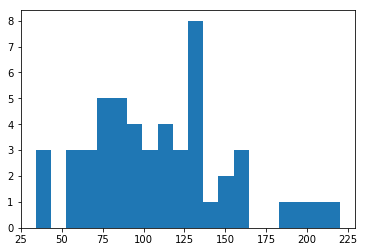

In [9]:
#make population in millions column
acc_pop = acc_pop.assign(POP_MIL = pd.Series(acc_pop.TOT_POP / 1000000).values)
#make accidents per million column
acc_pop = acc_pop.assign(ACC_MIL = pd.Series(acc_pop.ACC / acc_pop.POP_MIL).values)
print(acc_pop)

plt.hist(acc_pop.ACC_MIL, normed=False, bins=20)

## Q2: accidents by age group

In [10]:
p = person
p.head()

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,127,1,1,2,...,240,0,0,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,83,1,1,22,...,2213,0,0,0,0,0,0,7,1,0
2,1,10003,1,1,1,0,11,1,1,1,...,125,0,0,0,0,0,0,7,2,0
3,1,10003,1,1,2,0,11,1,1,1,...,8888,999,99,0,0,0,8,0,0,0
4,1,10004,1,1,1,0,45,4,1,0,...,57,0,0,0,0,0,0,7,1,0


In [26]:
#all people involved
p_age = p.groupby(p.AGE).size()

#only drivers (PER_TYP == 1)
p_drive = p[p['PER_TYP'] == 1]

p_d_age = p_drive.groupby(p_drive.AGE).size()
p_d_age


AGE
6         2
7         1
8         4
9         6
10        4
11        5
12        8
13       12
14       18
15       94
16      387
17      651
18      955
19     1096
20     1125
21     1203
22     1277
23     1242
24     1220
25     1215
26     1123
27     1091
28      935
29      997
30      948
31      960
32      895
33      845
34      851
35      878
       ... 
73      263
74      247
75      242
76      245
77      209
78      208
79      184
80      198
81      178
82      157
83      163
84      157
85      142
86      129
87      106
88      102
89       83
90       60
91       46
92       35
93       27
94       25
95       11
96        6
97        5
98        3
99        1
103       1
998      71
999     902
dtype: int64